<a href="https://colab.research.google.com/github/jerielizabeth/Workshops-DataVisualization/blob/main/REL503_001_Pandas2_Aggregating_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the challenges with data visualization is we need to manipulate our data from tidy formats to aggregations so that the data represents the relationships we are interested in.

For this exercise, we are going to be using an example from the Introduction to Cultural History digital text book - https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/02-Pandas-Basics-Part2.html

To begin, download the following CSV file and upload into the Colab file folder.

https://github.com/melaniewalsh/Intro-Cultural-Analytics/blob/master/book/data/Trans-Atlantic-Slave-Trade_Americas.csv 

In [1]:
import pandas as pd

In [2]:
# Adjust the display settings to see more rows
pd.options.display.max_rows = 100

In [3]:
# Create the dataframe

slave_voyages_df = pd.read_csv('Trans-Atlantic-Slave-Trade_Americas.csv', delimiter=",", encoding='utf-8')

In [4]:
slave_voyages_df

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,"[u'AHNM, Ultramar, Leg. 3551, 6<><i>Archivo Hi..."
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,"[u'IUP,ST,50/B/137<>Great Britain, <i>Irish Un..."
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,"[u'IUP,ST,50/B/144<>Great Britain, <i>Irish Un..."
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,"[u'IUP,ST,50/A/23-4<>Great Britain, <i>Irish U..."


In [5]:
# To get the total rows and columns in the dataframe ...

slave_voyages_df.shape

(20741, 14)

In [6]:
# And to see the different data types that we are working with ...

slave_voyages_df.dtypes

year_of_arrival        int64
flag                  object
place_of_purchase     object
place_of_landing      object
percent_women        float64
percent_children     float64
percent_men          float64
total_embarked       float64
total_disembarked    float64
resistance_label      object
vessel_name           object
captain's_name        object
voyage_id              int64
sources               object
dtype: object

## Summary Statistics
We can compute some basic descriptive statistics about our data (mean, standard deviation) as well as unique counts.

In [7]:
slave_voyages_df.describe(include='all')

,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
count,20741.000000,19583,20663,20741,2894.000000,2927.000000,2894.000000,20722.000000,20719.000000,372,20741,19396,20741.000000,20741
unique,NaN,8,156,187,NaN,NaN,NaN,NaN,NaN,6,5849,12233,NaN,13754
top,NaN,Great Britain,"Africa., port unspecified","Barbados, port unspecified",NaN,NaN,NaN,NaN,NaN,Slave insurrection,,"Smith, John",NaN,"[u'mettas,I<>Mettas, Jean, <i>R\xe9pertoire d..."
freq,NaN,10536,5999,2038,NaN,NaN,NaN,NaN,NaN,330,712,36,NaN,1134
mean,1752.014850,NaN,NaN,NaN,0.274198,0.231582,0.496648,295.050381,251.573966,NaN,NaN,NaN,42783.741671,NaN
std,59.702189,NaN,NaN,NaN,0.116513,0.149508,0.140324,147.997690,128.050439,NaN,NaN,NaN,32401.785320,NaN
min,1520.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,112.000000,NaN
25%,1724.000000,NaN,NaN,NaN,0.195265,0.115380,0.407460,194.000000,163.000000,NaN,NaN,NaN,17862.000000,NaN
50%,1765.000000,NaN,NaN,NaN,0.264110,0.215100,0.497890,282.000000,241.000000,NaN,NaN,NaN,31916.000000,NaN
75%,1792.000000,NaN,NaN,NaN,0.346150,0.321900,0.586765,368.000000,313.000000,NaN,NaN,NaN,78283.000000,NaN


## Working with NAN

In [8]:
# Identify all rows where we have a value for percent_women
slave_voyages_df['percent_women'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
20736    False
20737    False
20738    False
20739    False
20740    False
Name: percent_women, Length: 20741, dtype: bool

In [9]:
# Filter the original data frame using the format above

slave_voyages_df[slave_voyages_df['percent_women'].notna()]


,year_of_arrival,flag,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
938,1613,Portugal / Brazil,Luanda,Santo Tomas,0.30556,0.20588,0.69444,362.0,290.0,NaN,NS de Nazareth,"Gómez, Juan",47352,"[u'AGI-Esc 38B, pieza 2, folios 427r-427v<><p>..."
1044,1619,Portugal / Brazil,Luanda,Veracruz,0.21127,0.21596,0.57277,349.0,279.0,NaN,S Antônio,"Acosta, Jacome de",29248,"[u'Vila Vilar,Cuadro3<><p>Vila Vilar, Enriquet..."
1115,1620,Portugal / Brazil,Luanda,Buenos Aires,0.13043,0.29193,0.57764,381.0,304.0,NaN,NS de Consolación,"Acosta, Gonçalo",29561,"[u'AGI, Indiferente General, 2795<><p><em>AG!<..."
1117,1620,NaN,Luanda,Cumana,0.29570,0.33571,0.70430,421.0,337.0,NaN,NS de Rocha,"Sosa, Nicolás de<br/> Estéves, Domingo<br/> Ro...",29941,"[u'AGI, Contratacion, 2881<><p><em>AG!</em> (S..."
1334,1628,Portugal / Brazil,"West Central Africa and St. Helena, port unspe...","Spanish Circum-Caribbean,unspecified",0.16908,0.58454,0.24638,303.0,242.0,NaN,S Pedro,"Silva, Jacinto da",29568,"[u'AGI, Indiferente General, 2796<><p><em>AG!<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,1841,Portugal / Brazil,Rio Pongo,"Cuba, port unspecified",0.20548,0.21233,0.58219,324.0,292.0,NaN,Segunda Rosália,"Peirano, Francisco",2078,"[u'PP,1845,XLIX:593-633<>Great Britain, <i>Par..."
20321,1841,Spain / Uruguay,"Africa., port unspecified","Bahamas, port unspecified",0.15758,0.31548,0.53939,215.0,193.0,NaN,Trovadore,"Velasea, de Bonita",5503,"[u'Dalleo,24<>Dalleo, Peter D.,""Africans in th..."
20429,1850,NaN,Benguela,"British Caribbean, colony unspecified",0.00000,1.00000,0.00000,94.0,74.0,NaN,Amélia,"Oliveira, José",4674,"[u'IUP,ST,38/A/208<>Great Britain, <i>Irish Un..."
20498,1854,U.S.A.,Whydah,Bahia Honda,0.45455,0.08333,0.54545,600.0,584.0,NaN,Grey Eagle,Darnaud,4190,"[u'FO84/965,Crawford,55.02.07,enc<><p><em>BNA<..."


In [10]:
# We can count the number of rows with and without information on the percentage of women

slave_voyages_df['percent_women'].isna().value_counts()

True     17847
False     2894
Name: percent_women, dtype: int64

In [11]:
# We can also convert that into a percentage of the whole

slave_voyages_df['percent_women'].isna().value_counts(normalize=True)

True     0.86047
False    0.13953
Name: percent_women, dtype: float64

## Counting

This gets us to one of the standard and generally useful operation we can do with Pandas - counting the number of rows when particular conditions are true.


In [12]:
# This first counts the number of rows with a value for each column and divides by the length (total number of rows) in the dataframe.

slave_voyages_df.count() / len(slave_voyages_df)

year_of_arrival      1.000000
flag                 0.944169
place_of_purchase    0.996239
place_of_landing     1.000000
percent_women        0.139530
percent_children     0.141121
percent_men          0.139530
total_embarked       0.999084
total_disembarked    0.998939
resistance_label     0.017935
vessel_name          1.000000
captain's_name       0.935153
voyage_id            1.000000
sources              1.000000
dtype: float64

In [13]:
# We can also set a value to put into the blank fields

slave_voyages_df['percent_women'].fillna('no gender information recorded')

0        no gender information recorded
1        no gender information recorded
2        no gender information recorded
3        no gender information recorded
4        no gender information recorded
                      ...              
20736    no gender information recorded
20737    no gender information recorded
20738    no gender information recorded
20739    no gender information recorded
20740    no gender information recorded
Name: percent_women, Length: 20741, dtype: object

## Renaming Columns

In [15]:
# Sometimes the data we get has strange names. We can change column names to be clearer.
slave_voyages_df.rename(columns={'flag': 'national_affiliation'})

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,sources
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,"[u'AGI,Patronato 175, r.9<><p><em>AG!</em> (Se..."
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,"[u'ANTT,CC,Parte II, maco 131, doc 54<><i>Inst..."
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,"[u'Pike,60-1,172<>Pike, Ruth, <i>Enterprise</i..."
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,"[u'Chaunus, 3: 162-63<><p>Chaunus, <em>xxxxxx<..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,"[u'AHNM, Ultramar, Leg. 3551, 6<><i>Archivo Hi..."
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,"[u'IUP,ST,50/B/137<>Great Britain, <i>Irish Un..."
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,"[u'IUP,ST,50/B/144<>Great Britain, <i>Irish Un..."
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,"[u'IUP,ST,50/A/23-4<>Great Britain, <i>Irish U..."


In [17]:
# To save that change, we can reassign our variable
slave_voyages_df = slave_voyages_df.rename(columns={'flag': 'national_affiliation'})

In [18]:
slave_voyages_df.columns

Index(['year_of_arrival', 'national_affiliation', 'place_of_purchase',
       'place_of_landing', 'percent_women', 'percent_children', 'percent_men',
       'total_embarked', 'total_disembarked', 'resistance_label',
       'vessel_name', 'captain's_name', 'voyage_id', 'sources'],
      dtype='object')

## Drop and Add Columns

In [19]:
# You can drop whole columns

slave_voyages_df = slave_voyages_df.drop(columns="sources")

slave_voyages_df

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052


In [20]:
# You can also create new columns based on operations done to the data.

slave_voyages_df['total_women'] = slave_voyages_df['total_embarked'] * slave_voyages_df['percent_women']

In [23]:
slave_voyages_df['total_men'] = slave_voyages_df['total_embarked'] * slave_voyages_df['percent_men']

In [24]:
slave_voyages_df.head(10)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,NaN,NaN
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,NaN,NaN
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,NaN,NaN
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,NaN,NaN
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,NaN,NaN
5,1526,NaN,Cape Verde Islands,San Domingo (a) Santo Domingo,NaN,NaN,NaN,359.0,287.0,NaN,Santa Maria de Guadalupe,"Pabon, Francisco",42679,NaN,NaN
6,1526,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,NaN,46474,NaN,NaN
7,1527,Spain / Uruguay,Cape Verde Islands,"Puerto Rico, port unspecified",NaN,NaN,NaN,325.0,260.0,NaN,Concepción,"Díaz, Alonso",99027,NaN,NaN
8,1532,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Antônio,"Afonso, Martim",11293,NaN,NaN
9,1532,NaN,Cape Verde Islands,San Juan,NaN,NaN,NaN,25.0,20.0,NaN,,"de Illanes, Manuel",28994,NaN,NaN


In [25]:
# Sort the dataframe by a column

slave_voyages_df.sort_values(by='percent_women', ascending=False)

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.00000,0.00000,0.00000,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.00000,0.00000
4269,1715,France,"Senegambia and offshore Atlantic, port unspeci...",Cap Francais,0.74747,0.16162,0.09091,120.0,118.0,NaN,Elisabeth,Beliveau,31883,89.69640,10.90920
1741,1659,Netherlands,Bonny,"Jamaica, port unspecified",0.72500,0.05882,0.27500,195.0,85.0,NaN,S Jan,"Veer, Adriaen Blaes van der",21566,141.37500,53.62500
19047,1819,Spain / Uruguay,"Africa., port unspecified",Havana,0.71429,0.00000,0.28571,178.0,161.0,NaN,Descubridor,Benoit<br/> Valdes,14868,127.14362,50.85638
18950,1818,Spain / Uruguay,"Africa., port unspecified",Havana,0.69355,0.30645,0.00000,69.0,62.0,NaN,Vencedor,Iturrondo,14857,47.85495,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20736,1864,Spain / Uruguay,"Africa., port unspecified","Cuba, port unspecified",NaN,NaN,NaN,488.0,465.0,NaN,Polaca,NaN,46554,NaN,NaN
20737,1865,Spain / Uruguay,"Africa., port unspecified",Isla de Pinas,NaN,NaN,NaN,152.0,145.0,Slave insurrection,Gato,NaN,4394,NaN,NaN
20738,1865,NaN,"Africa., port unspecified",Mariel,NaN,NaN,NaN,780.0,650.0,NaN,,NaN,4395,NaN,NaN
20739,1865,NaN,Congo River,"Cuba, port unspecified",NaN,NaN,NaN,1265.0,1004.0,NaN,Cicerón,Mesquita,5052,NaN,NaN


In [26]:
# We can also truncate

slave_voyages_df.sort_values(by='percent_women', ascending=False)[:30]

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.00000,0.00000,0.00000,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.00000,0.00000
4269,1715,France,"Senegambia and offshore Atlantic, port unspeci...",Cap Francais,0.74747,0.16162,0.09091,120.0,118.0,NaN,Elisabeth,Beliveau,31883,89.69640,10.90920
1741,1659,Netherlands,Bonny,"Jamaica, port unspecified",0.72500,0.05882,0.27500,195.0,85.0,NaN,S Jan,"Veer, Adriaen Blaes van der",21566,141.37500,53.62500
19047,1819,Spain / Uruguay,"Africa., port unspecified",Havana,0.71429,0.00000,0.28571,178.0,161.0,NaN,Descubridor,Benoit<br/> Valdes,14868,127.14362,50.85638
18950,1818,Spain / Uruguay,"Africa., port unspecified",Havana,0.69355,0.30645,0.00000,69.0,62.0,NaN,Vencedor,Iturrondo,14857,47.85495,0.00000
19037,1819,Spain / Uruguay,Ambriz,Havana,0.68456,0.00000,0.31544,164.0,149.0,NaN,Supremo Habanero,"Blanco, Pedro",14372,112.26784,51.73216
4894,1721,France,Benin,"Martinique, port unspecified",0.67797,0.15254,0.16949,69.0,59.0,NaN,Saint Jean Triomphant,"Gaulart, J",33087,46.77993,11.69481
4150,1714,Great Britain,Calabar,Saint John (Antigua),0.66667,0.16667,0.33333,360.0,240.0,NaN,Florida,"Payne, Samuel",75489,240.00120,119.99880
6259,1734,Netherlands,Jacquin,Suriname,0.66480,0.09078,0.24441,716.0,374.0,NaN,Rusthof,"Bovenmans, Anthony<br/> Theunissen, Willem",10278,475.99680,174.99756
1823,1664,Great Britain,New Calabar,"Barbados, port unspecified",0.65217,0.08696,0.26087,242.0,168.0,NaN,Elizabeth,"Francis, William",9558,157.82514,63.13054


# Mathematical operations

Pandas calculations | Explanation
------------------- | ------------
.count()            |  Number of observations
.sum()              |  Sum of values
.mean()             |  Mean of values
.median()           |  Median of values
.min()              |  Minimum
.max()              |  Maximum
.mode()             |  Mode
.std()              |  Unbiased standard deviation

In [27]:
slave_voyages_df['percent_women'].mean()

0.27419760653973696

In [28]:
slave_voyages_df['percent_women'].max()

1.0

In [29]:
# We can pull out the corresponding row

slave_voyages_df[slave_voyages_df['percent_women'] == slave_voyages_df['percent_women'].max()]

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
19042,1819,Spain / Uruguay,Luanda,Havana,1.0,0.0,0.0,82.0,73.0,NaN,S José Diligente,Estepa,14378,82.0,0.0


# Groupby Functions

Sometimes we want to group together data before applying an operation

In [30]:
slave_voyages_df.groupby('national_affiliation')

In [31]:
slave_voyages_df.groupby('national_affiliation').count()

,year_of_arrival,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
national_affiliation,,,,,,,,,,,,,,
Denmark / Baltic,290,290,290,119,119,119,290,290,8,290,163,290,119,119
France,3381,3377,3381,708,709,708,3381,3381,121,3381,3289,3381,708,708
Great Britain,10536,10530,10536,1123,1151,1123,10526,10525,152,10536,10226,10536,1123,1123
Netherlands,1389,1341,1389,200,201,200,1387,1387,51,1389,1316,1389,200,200
Other,4,4,4,0,0,0,4,4,0,4,2,4,0,0
Portugal / Brazil,1009,1009,1009,42,48,42,1009,1009,0,1009,874,1009,42,42
Spain / Uruguay,1528,1524,1528,468,465,468,1528,1528,4,1528,1323,1528,468,468
U.S.A.,1446,1436,1446,223,223,223,1443,1442,31,1446,1283,1446,223,223


In [32]:
slave_voyages_df.groupby('national_affiliation').count()['percent_women']

national_affiliation
Denmark / Baltic      119
France                708
Great Britain        1123
Netherlands           200
Other                   0
Portugal / Brazil      42
Spain / Uruguay       468
U.S.A.                223
Name: percent_women, dtype: int64

In [33]:
slave_voyages_df.groupby('national_affiliation')['percent_women'].count().sort_values(ascending=False)

national_affiliation
Great Britain        1123
France                708
Spain / Uruguay       468
U.S.A.                223
Netherlands           200
Denmark / Baltic      119
Portugal / Brazil      42
Other                   0
Name: percent_women, dtype: int64

## Visualization

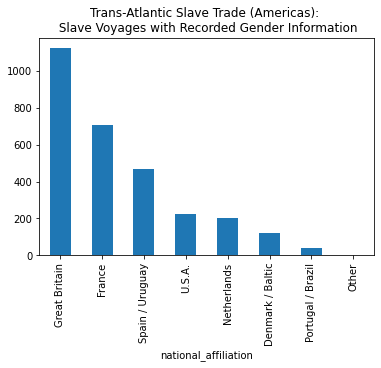

In [34]:
# We can create a quick visualization with builtin tools in Pandas

slave_voyages_df.groupby('national_affiliation')['percent_women'].count()\
.sort_values(ascending=False).plot(kind='bar', title='Trans-Atlantic Slave Trade (Americas): \n Slave Voyages with Recorded Gender Information')

# Create data for export

In [35]:
totals_df = slave_voyages_df.groupby('year_of_arrival')['total_women', 'total_men', 'total_embarked'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [36]:
totals_df

,total_women,total_men,total_embarked
year_of_arrival,,,
1520,0.0,0.0,324.0
1525,0.0,0.0,359.0
1526,0.0,0.0,1795.0
1527,0.0,0.0,325.0
1532,0.0,0.0,1030.0
...,...,...,...
1862,0.0,0.0,12265.0
1863,0.0,0.0,6179.0
1864,0.0,0.0,4514.0


In [37]:
# Save out as a CSV
totals_df.to_csv("totals_men_women.csv", encoding='utf-8', index=False)

# Combining data frames 

There are many ways to combine dataframes, but the two most common are concatinate and merge. 

With a concatinate, you add information to the end of a dataframe. This works if the columns match.

We can split up a dataframe to practice ....


In [38]:
top_df = slave_voyages_df.head(10)
bottom_df = slave_voyages_df.tail(10)

In [39]:
top_df

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,NaN,NaN
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,NaN,NaN
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,NaN,NaN
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,NaN,NaN
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,NaN,NaN
5,1526,NaN,Cape Verde Islands,San Domingo (a) Santo Domingo,NaN,NaN,NaN,359.0,287.0,NaN,Santa Maria de Guadalupe,"Pabon, Francisco",42679,NaN,NaN
6,1526,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,NaN,46474,NaN,NaN
7,1527,Spain / Uruguay,Cape Verde Islands,"Puerto Rico, port unspecified",NaN,NaN,NaN,325.0,260.0,NaN,Concepción,"Díaz, Alonso",99027,NaN,NaN
8,1532,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Antônio,"Afonso, Martim",11293,NaN,NaN
9,1532,NaN,Cape Verde Islands,San Juan,NaN,NaN,NaN,25.0,20.0,NaN,,"de Illanes, Manuel",28994,NaN,NaN


In [42]:
join_df = pd.concat([top_df, bottom_df], axis=0)

In [43]:
join_df

,year_of_arrival,national_affiliation,place_of_purchase,place_of_landing,percent_women,percent_children,percent_men,total_embarked,total_disembarked,resistance_label,vessel_name,captain's_name,voyage_id,total_women,total_men
0,1520,NaN,Portuguese Guinea,San Juan,NaN,NaN,NaN,324.0,259.0,NaN,,NaN,42987,NaN,NaN
1,1525,Portugal / Brazil,Sao Tome,"Hispaniola, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Maria de Bogoña,"Monteiro, Pero",46473,NaN,NaN
2,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11297,NaN,NaN
3,1526,Spain / Uruguay,Cape Verde Islands,"Cuba, port unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,"Carega, Esteban (?)",11298,NaN,NaN
4,1526,NaN,Cape Verde Islands,Caribbean (colony unspecified),NaN,NaN,NaN,359.0,287.0,NaN,S Anton,"Leon, Juan de",42631,NaN,NaN
5,1526,NaN,Cape Verde Islands,San Domingo (a) Santo Domingo,NaN,NaN,NaN,359.0,287.0,NaN,Santa Maria de Guadalupe,"Pabon, Francisco",42679,NaN,NaN
6,1526,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,,NaN,46474,NaN,NaN
7,1527,Spain / Uruguay,Cape Verde Islands,"Puerto Rico, port unspecified",NaN,NaN,NaN,325.0,260.0,NaN,Concepción,"Díaz, Alonso",99027,NaN,NaN
8,1532,Portugal / Brazil,Sao Tome,"Spanish Caribbean, unspecified",NaN,NaN,NaN,359.0,287.0,NaN,S Antônio,"Afonso, Martim",11293,NaN,NaN
9,1532,NaN,Cape Verde Islands,San Juan,NaN,NaN,NaN,25.0,20.0,NaN,,"de Illanes, Manuel",28994,NaN,NaN


Merges are a little harder to explain. In a merge, we are looking to add columns of data based on some shared key.

We'll work through an example from data carpentry - https://datacarpentry.org/python-ecology-lesson/05-merging-data/ 